In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df= pd.read_csv('India House Rent.csv')

In [3]:
df

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0
...,...,...,...,...,...,...,...,...,...,...
7686,"3 BHK Flat for Rent in Saket, New Delhi",Saket,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0
7687,"2 BHK Flat for Rent in Phase 7 JP Nagar, Banga...",Phase 7 JP Nagar,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0
7688,"2 BHK Flat for Rent in Malpani Vivanta, Balewa...",Balewadi,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0
7689,"1 BHK Flat for Rent in Shalimar bagh, New Delhi",Shalimar bagh,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB


In [5]:
df.describe()

,area,beds,bathrooms,balconies,area_rate,rent
count,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7.691000e+03
mean,1106.354180,2.208685,2.137043,0.817319,47.619989,5.479508e+04
std,1197.426843,0.993481,1.027677,1.243361,68.989657,9.742006e+04
min,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000e+03
25%,600.000000,1.000000,1.000000,0.000000,21.000000,1.500000e+04
50%,900.000000,2.000000,2.000000,0.000000,31.000000,2.800000e+04
75%,1300.000000,3.000000,3.000000,2.000000,54.000000,5.700000e+04
max,70000.000000,10.000000,10.000000,10.000000,2586.000000,2.700000e+06


In [6]:
df.drop(["area_rate","house_type"], axis=1, inplace=True)

In [7]:
df.isnull().sum()

locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
rent          0
dtype: int64

In [8]:
df["furnishing"].unique() 


array(['Semi-Furnished', 'Unfurnished', 'Furnished'], dtype=object)

In [9]:
df["city"].unique()

array(['Mumbai', 'Pune', 'Nagpur', 'Bangalore', 'New Delhi'], dtype=object)

In [10]:
df["locality"].unique()

array(['Goregaon East', 'Powai', 'Mundhwa', ..., 'Anjanapura Township',
       'Qutub Vihar Phase 2', 'Govindpura'], dtype=object)

In [11]:
df["locality"].value_counts()

locality
Hadapsar                 106
Kharadi                   98
Wagholi                   94
Whitefield                88
Andheri West              78
                        ... 
Neb Sarai Saket            1
Block 4 Subhash Nagar      1
Vikaspuri Block J          1
Sindhi Colony Sion         1
Govindpura                 1
Name: count, Length: 1984, dtype: int64

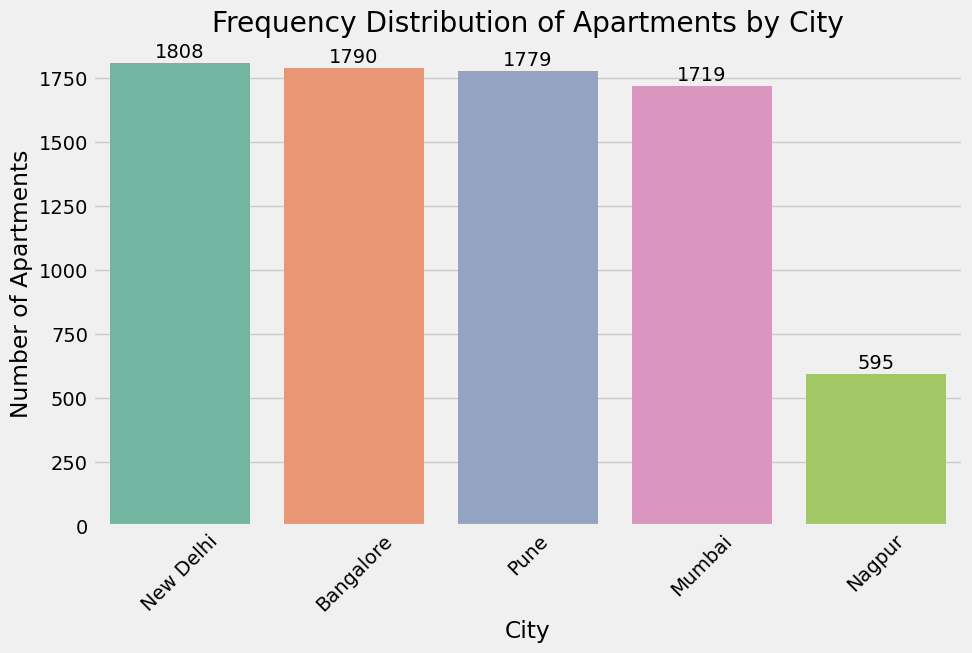

In [12]:
city_counts = df["city"].value_counts().reset_index()
city_counts.columns = ["city", "count"]

# Create bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="city", y="count", data=city_counts, palette="Set2")

# Add labels and title
plt.xlabel("City")
plt.ylabel("Number of Apartments")
plt.title("Frequency Distribution of Apartments by City")
plt.xticks(rotation=45)

# Add counts above bars
for index, row in city_counts.iterrows():
    plt.text(index, row["count"] + 5, row["count"], ha="center", va="bottom")

# Show the plot
plt.show()


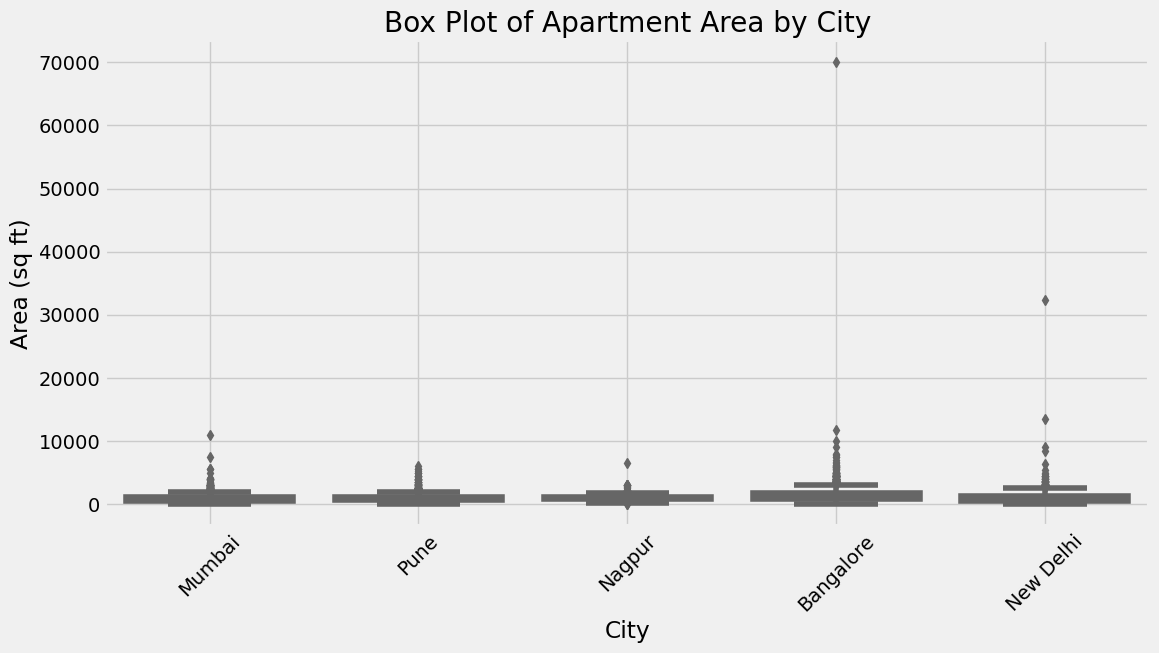

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x="city", y="area", data=df, palette="Set3")

# Add labels and title
plt.xlabel("City")
plt.ylabel("Area (sq ft)")
plt.title("Box Plot of Apartment Area by City")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

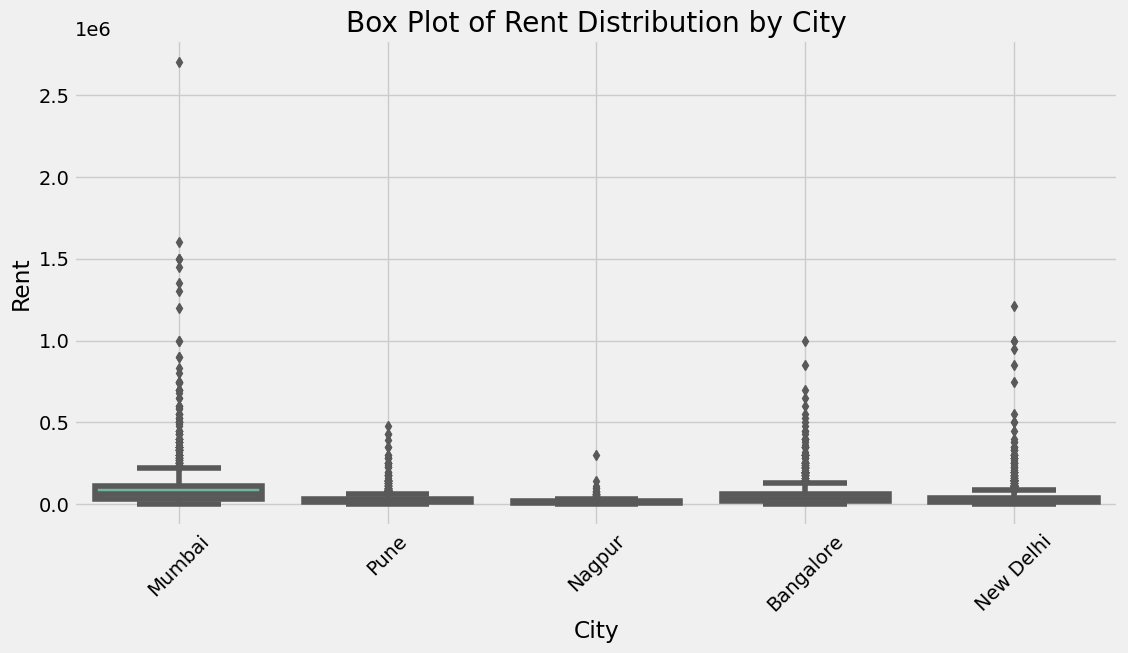

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x="city", y="rent", data=df, palette="Set2")

# Add labels and title
plt.xlabel("City")
plt.ylabel("Rent")
plt.title("Box Plot of Rent Distribution by City")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [16]:
top10 = df.sort_values(by="rent", ascending=False).head(10)

# Print title then the table
print("Top 10 Most Expensive Apartments\n")
print(top10[["rent", "area", "beds", "bathrooms", "balconies", "city"]].to_string(index=False))

Top 10 Most Expensive Apartments

     rent    area  beds  bathrooms  balconies      city
2700000.0 11001.0     5          5          0    Mumbai
1600000.0  4000.0     4          4          0    Mumbai
1500000.0  5580.0     5          5          0    Mumbai
1500000.0   580.0     2          2          0    Mumbai
1500000.0  5600.0     5          5          2    Mumbai
1450000.0  7500.0     5          6          2    Mumbai
1350000.0  3060.0     4          4          0    Mumbai
1300000.0  3875.0     4          5          0    Mumbai
1210000.0  3625.0     5          5          0 New Delhi
1200000.0  3100.0     4          5          0    Mumbai


In [17]:
# Select lowest 10 apartments with rent
lowest10 = df.sort_values(by="rent", ascending=True).head(10)

# Print title then the table
print("Lowest 10 Apartments by Rent\n")
print(lowest10[["rent", "area", "beds", "bathrooms", "balconies", "city"]].to_string(index=False))

Lowest 10 Apartments by Rent

  rent  area  beds  bathrooms  balconies      city
1000.0   7.0     1          1          0    Mumbai
2000.0 350.0     1          1          0    Nagpur
2500.0 100.0     1          1          0      Pune
2500.0 340.0     1          2          0      Pune
2900.0 120.0     1          4          0 New Delhi
3000.0 450.0     1          1          0 New Delhi
3000.0 450.0     1          1          0      Pune
3000.0 350.0     1          1          0 Bangalore
3500.0 400.0     1          1          0 New Delhi
3500.0 300.0     1          1          0      Pune


# Select Features & Target

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [19]:
# Select features and target
features = ["area", "beds", "bathrooms", "balconies"]
X = df[features]
y = df["rent"]


# Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [23]:
##Model Predoction 
y_pred = lr.predict(X_test)


In [24]:
##Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance\n")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


Linear Regression Model Performance

MAE  : 34163.51
MSE  : 4591973266.63
RMSE : 67764.10
R²   : 0.3873


In [25]:
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": lr.coef_
})

print("\nFeature Impact on Rent:\n")
print(coeff_df.sort_values(by="Coefficient", ascending=False))



Feature Impact on Rent:

     Feature   Coefficient
2  bathrooms  39187.639097
1       beds   6501.396453
0       area     16.256118
3  balconies  -7092.602919


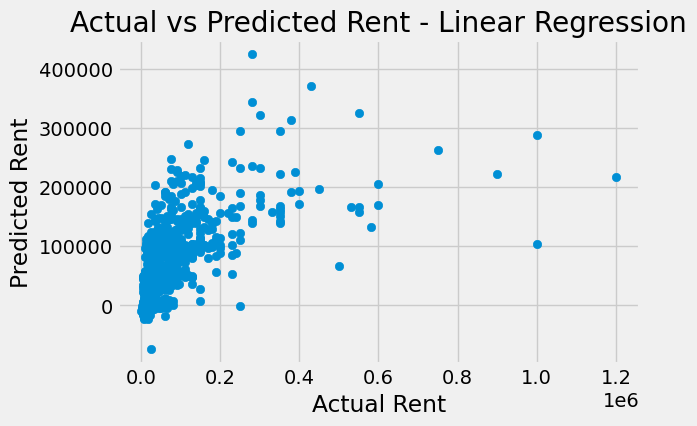

In [29]:
##Actual VS Predicted Plot
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent - Linear Regression")
plt.grid(True)
plt.show()



In [30]:
comparison_df = pd.DataFrame({
    "Actual_Rent": y_test.values,
    "Predicted_Rent": y_pred
})

print("Actual vs Predicted Rent (Sample Rows)\n")
print(comparison_df.head(10).to_string(index=False))


Actual vs Predicted Rent (Sample Rows)

 Actual_Rent  Predicted_Rent
    240000.0    88718.730756
     40000.0   102168.925180
    130000.0    85282.304897
     78000.0    99425.127385
     80000.0   205093.376701
    100000.0   137409.813765
      7000.0    44210.006802
      4000.0    -6193.302911
     32000.0    -2616.956994
     82000.0    62968.516078


In [31]:
comparison_df["Error"] = comparison_df["Actual_Rent"] - comparison_df["Predicted_Rent"]
comparison_df["Absolute_Error"] = comparison_df["Error"].abs()

print(comparison_df.head(10).to_string(index=False))


 Actual_Rent  Predicted_Rent          Error  Absolute_Error
    240000.0    88718.730756  151281.269244   151281.269244
     40000.0   102168.925180  -62168.925180    62168.925180
    130000.0    85282.304897   44717.695103    44717.695103
     78000.0    99425.127385  -21425.127385    21425.127385
     80000.0   205093.376701 -125093.376701   125093.376701
    100000.0   137409.813765  -37409.813765    37409.813765
      7000.0    44210.006802  -37210.006802    37210.006802
      4000.0    -6193.302911   10193.302911    10193.302911
     32000.0    -2616.956994   34616.956994    34616.956994
     82000.0    62968.516078   19031.483922    19031.483922


In [32]:
print("Prediction Error Summary\n")
print(comparison_df[["Error", "Absolute_Error"]].describe())


Prediction Error Summary

               Error  Absolute_Error
count    1539.000000     1539.000000
mean    -1010.077302    34163.512694
std     67778.595629    58541.049470
min   -171746.884844       22.367705
25%    -28107.931044    10379.677848
50%     -3847.036105    21104.640528
75%     14131.042570    38249.124464
max    982958.376714   982958.376714


In [33]:
within_10_percent = (
    (comparison_df["Absolute_Error"] / comparison_df["Actual_Rent"]) <= 0.10
).mean() * 100

print(f"Predictions within 10% of actual rent: {within_10_percent:.2f}%")


Predictions within 10% of actual rent: 7.28%
